In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import glob
import os

In [18]:
def plot_history(name, keys):
    '''
    Plots the 
    '''
    history = pickle.load(open("histories/" + name + ".pt" , "rb"))
    num_episodes = len(history[keys[0]])
    fig = plt.figure(figsize = (20,5))
    plot_position = 1
    n_plots = (len(keys))
    plot_color =  {
        'num_coins_collected' : "gold",
        'cumulative_reward' : "green",
        'num_crates_destroyed' : "brown",
        'round_length'    : "black",
        'num_invalid_actions': "red",
        'num_bombs_dropped': 'blue'
    }
    for x in keys:
        
        array = np.array(history[x])
        plt.subplot(1,n_plots,plot_position)
        plt.plot(np.arange(num_episodes), array, color =plot_color[x])
        plot_position += 1
    plt.show()                        

In [19]:
def plot_average_histories(folder_name, keys):
    histories = [pickle.load(open(historyPath, "rb")) for historyPath in glob.glob(f'{"histories/"+ folder_name}/*.pt')]
    num_episodes = len(histories[0][keys[0]])
    
    fig = plt.figure(figsize = (20,5))
    plot_position = 1
    n_plots = (len(keys))
    plot_color =  {
        'num_coins_collected' : "gold",
        'cumulative_reward' : "green",
        'num_crates_destroyed' : "brown",
        'round_length'    : "black",
        'num_invalid_actions': "red",
        'num_bombs_dropped': 'blue'
    }
        
    for x in keys:
        array = np.stack([np.array(history[x]) for history in histories])
        mean_array = np.mean(array, axis=0)
        plt.subplot(1,n_plots,plot_position)
        plt.plot(np.arange(num_episodes), mean_array, label= x, color = plot_color[x])
        plot_position += 1
    plt.show()
    

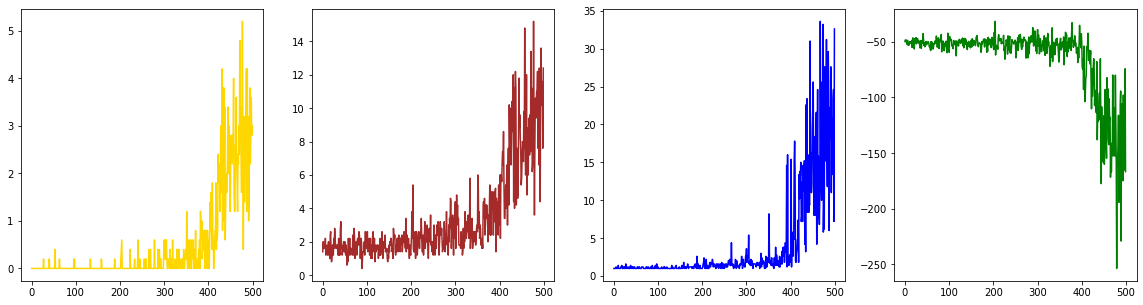

In [29]:
keys = ['num_coins_collected','num_crates_destroyed', 'num_bombs_dropped', 'cumulative_reward']
plot_average_histories("N-STEP-SARSA_OLD", keys)

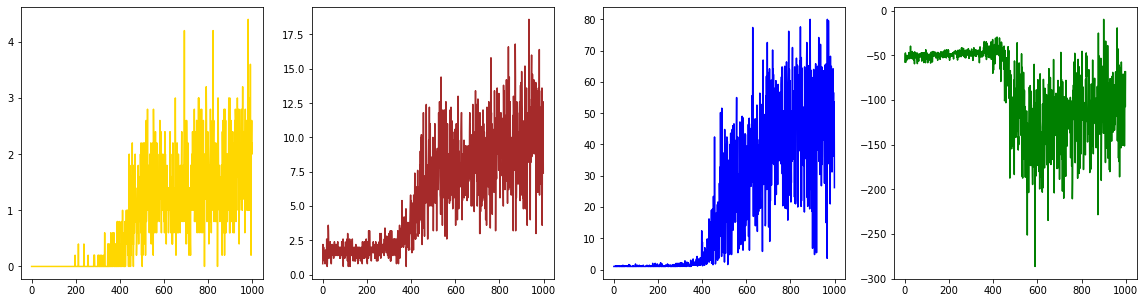

In [30]:
plot_average_histories("N-STEP-SARSA", keys)

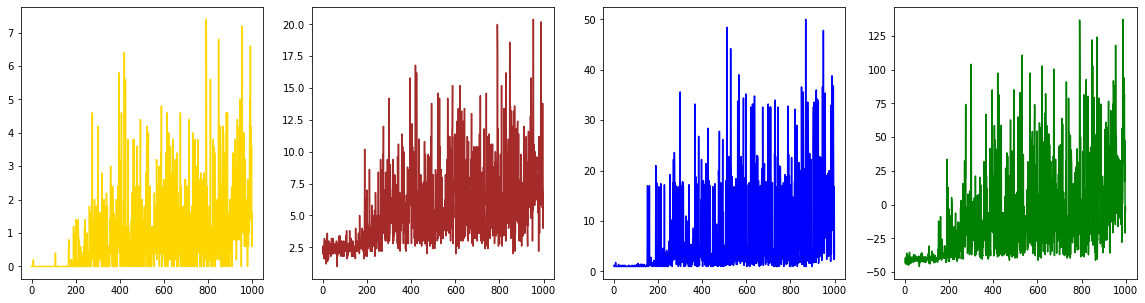

In [31]:
plot_average_histories('SARSA(LAMBDA)_OLD', keys)

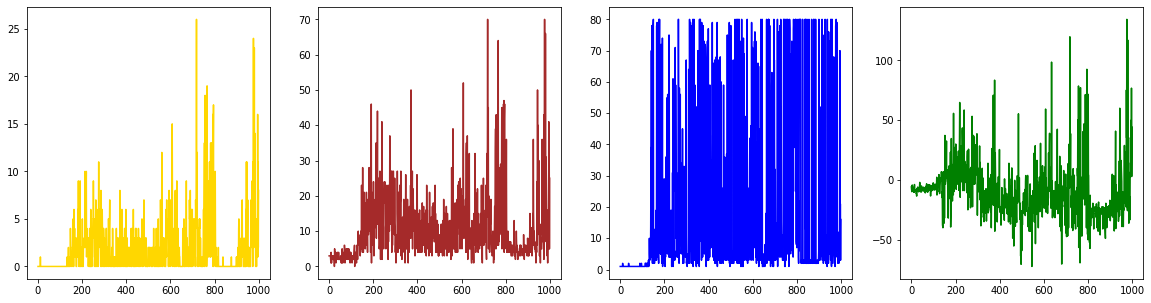

In [83]:
plot_history('SARSA(LAMBDA)/27_03_2021_19_28_28_643157', keys)